In [ ]:
import tensorflow.keras as keras
# import keras
from keras.datasets import imdb
import numpy as np
import matplotlib.pyplot as plt

In [8]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=15000)

17465344/17464789 [==============================] - 0s 0us/step


In [9]:
x_train.shape

(25000,)

In [10]:
type(x_train[0]), type(x_train)

(list, numpy.ndarray)

In [11]:
print(x_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


##### the x_train and y_train are the list of reviews.Each review is a list of word indices.

## get back the review in readable format

##### In order to get the word at their respective word indices, we will use get_word_index function, where each word is a key and their respective indices is Value.

In [ ]:
word_dict = imdb.get_word_index()

In [10]:
#### Maximam number of indices
max([max(i) for i in x_train])

14999

In [ ]:
word_indices_dict = dict([(value, key) for key,value in word_dict.items()])

In [12]:
max(word_indices_dict.keys())

88584

In [ ]:
review = " ".join([word_indices_dict.get(i-3, ' ') for i in x_train[0]])

In [14]:
review

"  this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert   is an amazing actor and now the same being director   father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for   and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the   of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they h

In [ ]:
def vectorizer(data, dimension =88586 ):
    result = np.zeros((len(data),dimension))
    for i,list_indices in enumerate(data):
        result[i,list_indices] = 1
    return result
        
x_train_vector  = vectorizer(x_train, 15000) 
x_test_vector =  vectorizer(x_test, 15000)

In [16]:
x_train_vector.shape
x_test_vector.shape

(25000, 15000)

In [ ]:
from tensorflow.python.keras import layers  
from tensorflow.python.keras import Sequential

## With 2 Dence Layers

In [ ]:
model = Sequential()

In [ ]:
model.add(layers.Dense(units=16, activation='relu', input_dim=15000, kernel_initializer='uniform'))
model.add(layers.Dense(units=16, activation='relu' , kernel_initializer='uniform'))
model.add(layers.Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                240016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 240,305
Trainable params: 240,305
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
train_data = x_train_vector[10000:]
val_data = x_train_vector[:10000]

train_label = y_train[10000:]
val_label = y_train[:10000]

In [20]:
trained_model = model.fit(x=train_data,
          y=train_label,
         batch_size=512,
         epochs=20,
         validation_data=(val_data,val_label))

Epoch 1/20
30/30 [==============================] - 1s 37ms/step - loss: 0.6491 - accuracy: 0.7597 - val_loss: 0.5706 - val_accuracy: 0.8363
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.4642 - accuracy: 0.8735 - val_loss: 0.4065 - val_accuracy: 0.8656
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3115 - accuracy: 0.9049 - val_loss: 0.3154 - val_accuracy: 0.8839
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2299 - accuracy: 0.9261 - val_loss: 0.2862 - val_accuracy: 0.8873
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1765 - accuracy: 0.9431 - val_loss: 0.2693 - val_accuracy: 0.8933
Epoch 6/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1420 - accuracy: 0.9545 - val_loss: 0.2752 - val_accuracy: 0.8929
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1160 - accuracy: 0.9619 - val_loss: 0.2803 - val_accuracy: 0.8915
Epoch 8/20
30

In [ ]:
# model.save("Imdb_Trained_model.h5")

In [ ]:
history_dict = trained_model.history

In [23]:
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
traing_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

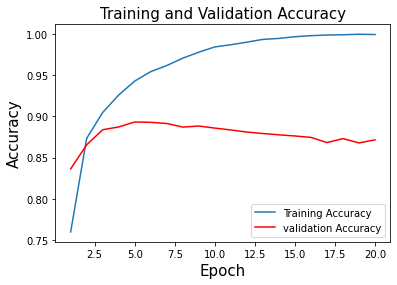

In [25]:

epoch = [i for i in range(1,len(traing_accuracy)+1)]
plt.plot(epoch, traing_accuracy, label = 'Training Accuracy')
plt.plot(epoch, validation_accuracy,"r", label = 'validation Accuracy')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Training and Validation Accuracy", fontsize=15)
plt.legend()
plt.show()

In [ ]:
traing_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

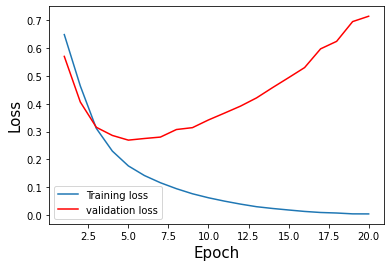

In [27]:
plt.plot(epoch, traing_loss, label = 'Training loss')
plt.plot(epoch, validation_loss,"r", label = 'validation loss')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.legend()
plt.show()

## With 1 Dense Layer 

In [ ]:
model = Sequential()

In [ ]:
model.add(layers.Dense(units=16, activation='relu', input_dim=15000, kernel_initializer='uniform'))
model.add(layers.Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [31]:
trained_model = model.fit(x=train_data,
          y=train_label,
         batch_size=512,
         epochs=20,
         validation_data=(val_data,val_label))

Epoch 1/20
30/30 [==============================] - 1s 29ms/step - loss: 0.6173 - accuracy: 0.7614 - val_loss: 0.5403 - val_accuracy: 0.8166
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4591 - accuracy: 0.8682 - val_loss: 0.4238 - val_accuracy: 0.8610
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3510 - accuracy: 0.8983 - val_loss: 0.3527 - val_accuracy: 0.8753
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2779 - accuracy: 0.9167 - val_loss: 0.3099 - val_accuracy: 0.8841
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2278 - accuracy: 0.9293 - val_loss: 0.2897 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1921 - accuracy: 0.9415 - val_loss: 0.2746 - val_accuracy: 0.8925
Epoch 7/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1639 - accuracy: 0.9489 - val_loss: 0.2697 - val_accuracy: 0.8927
Epoch 8/20
30

In [ ]:
history_dict = trained_model.history

In [ ]:
traing_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

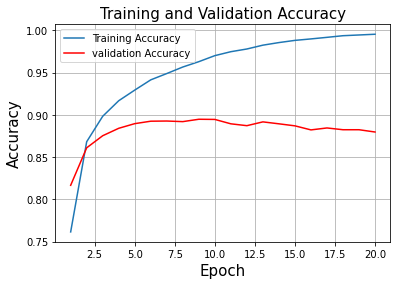

In [34]:
epoch = [i for i in range(1,len(traing_accuracy)+1)]
plt.plot(epoch, traing_accuracy, label = 'Training Accuracy')
plt.plot(epoch, validation_accuracy,"r", label = 'validation Accuracy')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Training and Validation Accuracy", fontsize=15)
plt.legend()
plt.grid()
plt.show()

In [ ]:
traing_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

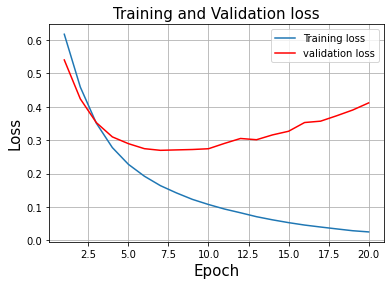

In [36]:
plt.plot(epoch, traing_loss, label = 'Training loss')
plt.plot(epoch, validation_loss,"r", label = 'validation loss')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and Validation loss", fontsize=15)
plt.grid()
plt.legend()
plt.show()

#### As we can see that model's parameters are highly varited, boz there's difference between training and validation accuracy.
#### As visualization we can train our model on epoch = 3 or 4.


In [43]:
model = Sequential()
model.add(layers.Dense(units=16, activation='relu', input_dim=15000, kernel_initializer='uniform'))
model.add(layers.Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
trained_model = model.fit(x=train_data,
                          y=train_label,
                         batch_size=512,
                         epochs=2,
                         validation_data=(val_data,val_label))

ERROR! Session/line number was not unique in database. History logging moved to new session 59
Epoch 1/2
30/30 [==============================] - 1s 28ms/step - loss: 0.6163 - accuracy: 0.7815 - val_loss: 0.5379 - val_accuracy: 0.8185
Epoch 2/2
30/30 [==============================] - 1s 26ms/step - loss: 0.4572 - accuracy: 0.8682 - val_loss: 0.4217 - val_accuracy: 0.8622


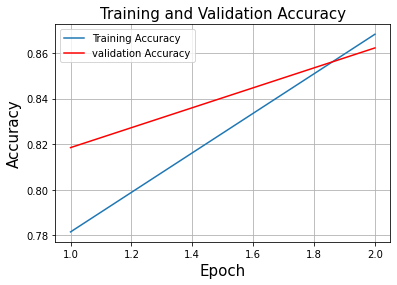

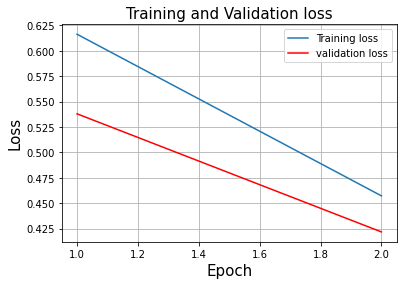

In [44]:
history_dict = trained_model.history

traing_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

traing_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epoch = [i for i in range(1,len(traing_accuracy)+1)]
plt.plot(epoch, traing_accuracy, label = 'Training Accuracy')
plt.plot(epoch, validation_accuracy,"r", label = 'validation Accuracy')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Training and Validation Accuracy", fontsize=15)
plt.legend()
plt.grid()
plt.show()

plt.plot(epoch, traing_loss, label = 'Training loss')
plt.plot(epoch, validation_loss,"r", label = 'validation loss')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and Validation loss", fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
def built_network(Number_of_input_feature=15000, Number_of_output_dim =1, No_of_dense_layer = 2, output_units =15, activation_fun = 'relu', 
                  output_activation ='sigmoid', optimizer = 'rmsprop', loss = 'binary_crossentropy'):
    model = Sequential()
    for i in range(No_of_dense_layer):
        model.add(layers.Dense(units=output_units, 
                               activation =activation_fun, 
                               kernel_initializer='uniform', 
                               input_dim = Number_of_input_feature))
        
    model.add(layers.Dense(units=Number_of_output_dim, 
                           activation=output_activation,
                           kernel_initializer='uniform'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
#     print(model.summary())
    return model

In [ ]:
mode_classifier = KerasClassifier(build_fn=built_network, nb_epoch=5, batch_size=512)

In [18]:
cvs = cross_val_score(estimator=mode_classifier, X = train_data, y= train_label, cv=5, scoring='accuracy')

24/24 [==============================] - 0s 7ms/step - loss: 0.6693 - accuracy: 0.7177


In [19]:
cvs.mean(), cvs.std()

(0.7956, 0.051535273788391206)

In [ ]:
parameter = {'No_of_dense_layer' : [1,2,3],
            'output_units': [16,32,512,],
             'optimizer' : ['rmsprop', 'adam'],
             "batch_size":[128, 512,1020],
             'nb_epoch' : [2,4,50]}

In [ ]:
grid = GridSearchCV(estimator=mode_classifier,
                    param_grid=parameter,
                    cv=5,
                    scoring='accuracy')

In [22]:
grid.fit(train_data, train_label)

118/118 [==============================] - 1s 11ms/step - loss: 0.3495 - accuracy: 0.8512


GridSearchCV(cv=5, error_score=nan,
             estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x7f00d679cf28>,
             iid='deprecated', n_jobs=None,
             param_grid={'No_of_dense_layer': [1, 2, 3],
                         'batch_size': [128, 512, 1020], 'nb_epoch': [2, 4, 50],
                         'optimizer': ['rmsprop', 'adam'],
                         'output_units': [16, 32, 512]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
grid.best_params_

{'No_of_dense_layer': 1,
 'batch_size': 128,
 'nb_epoch': 2,
 'optimizer': 'adam',
 'output_units': 512}

In [24]:
grid.best_score_

0.8860666666666667

In [ ]:
### Now fit a new model on returned parameters.

Epoch 1/2
118/118 [==============================] - 4s 33ms/step - loss: 0.3499 - accuracy: 0.8574 - val_loss: 0.2815 - val_accuracy: 0.8880
Epoch 2/2
118/118 [==============================] - 2s 16ms/step - loss: 0.1300 - accuracy: 0.9554 - val_loss: 0.3051 - val_accuracy: 0.8893


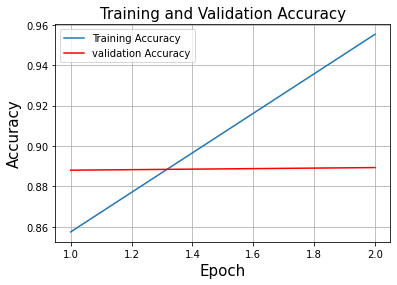

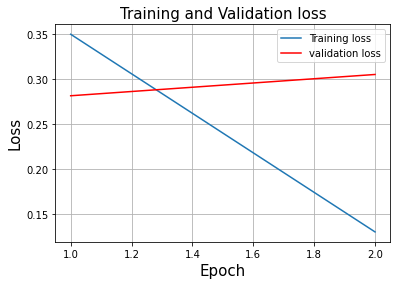

In [25]:
model = Sequential()

model.add(layers.Dense(units=512, activation='relu', input_dim=15000, kernel_initializer='uniform'))
# model.add(layers.Dense(units=512, activation='relu', input_dim=15000, kernel_initializer='uniform'))

model.add(layers.Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

trained_model = model.fit(x=train_data,
                          y=train_label,
                        batch_size = 128,
                         epochs=2,
                         validation_data=(val_data,val_label))


history_dict = trained_model.history

traing_accuracy = history_dict['accuracy']
validation_accuracy = history_dict['val_accuracy']

traing_loss = history_dict['loss']
validation_loss = history_dict['val_loss']

epoch = [i for i in range(1,len(traing_accuracy)+1)]
plt.plot(epoch, traing_accuracy, label = 'Training Accuracy')
plt.plot(epoch, validation_accuracy,"r", label = 'validation Accuracy')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Training and Validation Accuracy", fontsize=15)
plt.legend()
plt.grid()
plt.show()

plt.plot(epoch, traing_loss, label = 'Training loss')
plt.plot(epoch, validation_loss,"r", label = 'validation loss')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.title("Training and Validation loss", fontsize=15)
plt.grid()
plt.legend()
plt.show()

In [26]:
x_test_vector = vectorizer(x_test, dimension=15000)
model.evaluate(x_test_vector, y_test, )

782/782 [==============================] - 2s 3ms/step - loss: 0.3329 - accuracy: 0.8729


[0.3329196572303772, 0.8728799819946289]

In [ ]:
y_pred = model.predict(x_test_vector)

In [28]:
len(y_pred)

25000

In [ ]:
y_pred = [1 if i[0] > 0.5 else 0 for i in  y_pred  ]

In [ ]:
# y_pred =(y_pred > 0.5)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy_score(y_test, y_pred)

0.87288

In [ ]:
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


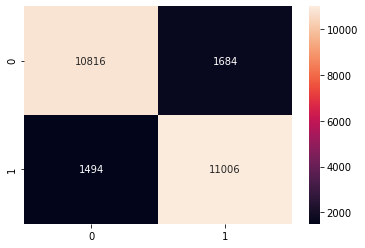

In [34]:
import seaborn as sns

sns.heatmap(cm, annot=True, fmt="")